In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from PIL import Image
import subprocess

In [2]:
from tensorflow.keras.models import load_model

# Especifica la ruta del archivo h5 de tu modelo
ruta_modelo_h5 = 'modelo_cnn.h5'

# Cargar el modelo
model = load_model(ruta_modelo_h5)

# Ahora el modelo está cargado y listo para ser utilizado


In [3]:
import numpy as np
import pandas as pd

df_test = pd.read_hdf('sportBalls_test.h5')
X_test = np.array(df_test['Imagen'])
y_test = df_test['Etiqueta']

for i in range(X_test.shape[0]):
    X_test[i] = np.array(Image.fromarray(X_test[i]).resize((150,150)))

# Codificar las etiquetas
etiquetas_test = y_test.unique()
y_encoded_test = pd.Categorical(y_test, categories=etiquetas_test).codes

X_val,y_val = X_test, y_encoded_test

y_val_one_hot = to_categorical(y_val)

X_val = np.array([np.array(img) for img in X_val])
X_val = X_val.astype('float32') / 255.0


In [4]:
# Obtener las predicciones del conjunto de validación
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

229/229 [==============================] - 4s 8ms/step


In [5]:
# Calcular la matriz de confusión
conf_mat = confusion_matrix(np.argmax(y_val_one_hot, axis=1), y_pred_classes)

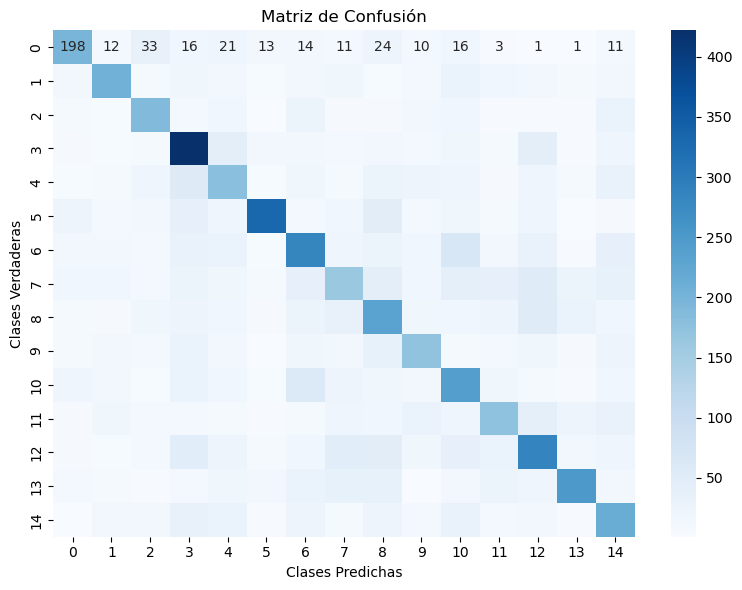

In [6]:
# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Verdaderas')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

In [4]:
# Evaluar el modelo en el conjunto de prueba y obtener el accuracy
test_loss, test_accuracy = model.evaluate(X_val, y_val_one_hot)

229/229 [==============================] - 4s 9ms/step - loss: 3.9340 - accuracy: 0.4842


In [5]:
# Imprimir el accuracy
print("Accuracy en el conjunto de prueba:", test_accuracy)

Accuracy en el conjunto de prueba: 0.4841703176498413
